In [1]:
from __future__ import division

from itertools import permutations

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.exception import NetworkXNoPath

In [2]:
import Selection_Algorithm

In [3]:
def graph():    
    import graph
    Graph = graph.H
    return Graph
G = graph()

In [4]:
__all__ = ['efficiency', 'local_efficiency', 'global_efficiency']

def efficiency(G, u, v):
    try:
        eff = 1 / nx.shortest_path_length(G, u, v)
    except NetworkXNoPath:
        eff = 0
    return eff

In [5]:
def global_efficiency(G):
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        g_eff = sum(efficiency(G, u, v) for u, v in permutations(G, 2)) / denom
    else:
        g_eff = 0
    # TODO This can be made more efficient by computing all pairs shortest
    # path lengths in parallel.
    # TODO This summation can be trivially parallelized.
    return g_eff

In [6]:
def local_efficiency(G):
    # TODO This summation can be trivially parallelized.
    efficiency_list = (global_efficiency(G.subgraph(G[v])) for v in G)
    return sum(efficiency_list) / len(G)

In [12]:
def eff():
    i=0
    eff_list=[]
    nodes =  G.nodes
    if nodes!= 0:
        H = G.copy()
        #H = nx.karate_club_graph()
        for i in G:            
            H.remove_node(i)
            geff = global_efficiency(H)            
            EF = (i, geff)       
            eff_list.append(EF)
    return  eff_list

In [13]:
#eff()

In [14]:
eff_table = pd.DataFrame(eff(), columns = ('nodes','global_efficiency'))

In [15]:
eff_table.index = eff_table.index + 1
#print(eff_table)

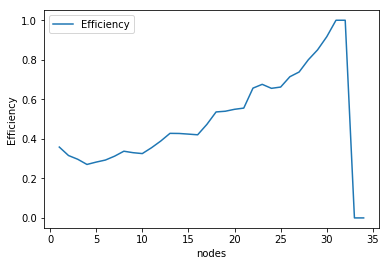

In [16]:
plt.plot(eff_table.global_efficiency)
plt.legend(["Efficiency"])
plt.xlabel("nodes")
plt.ylabel("Efficiency")
plt.show()

# G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_path([0,1,2,3])
ebunch=[(1,2),(2,3)]
G.remove_edges_from(ebunch)

# e = G.nodes()
G.remove_nodes_from(e)
#G.nodes()